## PART A — Data Preparation ##

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
historical_data= pd.read_csv("historical_data.csv")
fear_greed_index=pd.read_csv("fear_greed_index.csv")

In [5]:
historical_data.shape
fear_greed_index.shape

(2644, 4)

In [6]:
historical_data.info()
fear_greed_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [8]:
historical_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [9]:
fear_greed_index.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [12]:
historical_data.isna().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [13]:
fear_greed_index.isna().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [15]:
historical_data.duplicated().sum()

0

In [16]:
fear_greed_index.duplicated().sum()

0

**Data Quality Checks**
Both datasets were inspected for missing values and duplicates.
No missing values or duplicate records were found, indicating good data quality and reliability for further analysis.

**CONVERT TIME → DATE**

In [ ]:
historical_data["Timestamp IST"] = pd.to_datetime(
    historical_data["Timestamp IST"],
    dayfirst=True,
    errors="coerce")

In [20]:
historical_data["Date"] = historical_data["Timestamp IST"].dt.date

In [21]:
historical_data["Timestamp IST"].isna().sum()

0

In [22]:
fear_greed_index["date"] = pd.to_datetime(fear_greed_index["date"])
fear_greed_index["Date"] = fear_greed_index["date"].dt.date

**Datetime Standardization :**
Trade timestamps were converted to datetime format using day-first parsing to handle regional date formats and aligned to daily granularity for sentiment analysis.

**MERGE DATASET**

In [28]:
merged_data = historical_data.merge(
    fear_greed_index,
    on="Date",
    how="left")

In [29]:
merged_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,timestamp,value,classification,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02


- Trader-level data was aligned with daily Bitcoin Fear/Greed sentiment using date-based merging.

**DAILY TRADER METRICS**

In [27]:
grouped= merged_data.groupby(["Account", "Date", "classification"])

In [116]:
daily_metrics = grouped.agg(
    daily_pnl=("Closed PnL", "sum"),
    trades_per_day=("Closed PnL", "count"),
    avg_trade_size=("Size USD", "mean"),
    win_rate=("Closed PnL", lambda x: (x > 0).mean())).reset_index()

In [32]:
daily_metrics.head()

,Account,Date,classification,daily_pnl,trade_per_day,avg_trade_size,win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,Extreme Greed,0.0,177,5089.718249,<bound method Series.mean of 14229 False\n1...
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,Extreme Greed,0.0,68,7976.664412,<bound method Series.mean of 14406 False\n1...
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,Extreme Greed,0.0,40,23734.500000,<bound method Series.mean of 14474 False\n1...
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,Extreme Greed,-21227.0,12,28186.666667,<bound method Series.mean of 14514 False\n1...
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,Extreme Greed,1603.1,27,17248.148148,<bound method Series.mean of 14526 True\n1...


 ### Leverage Data Availability
The provided trader dataset did not contain an explicit leverage column. Therefore, the analysis focuses on realized PnL, trade frequency, and trade size, which are reliable indicators of trading behavior and risk.

## Part B — Analysis ##

In [47]:
daily_metrics["drawdown_proxy"]= daily_metrics["daily_pnl"]

In [77]:
performance_by_sentiment= daily_metrics.groupby("classification").agg(
    avg_daily_pnl=("daily_pnl", "mean"),
    win_rate=("daily_pnl", lambda x: (x > 0).mean()),
    worst_daily_pnl=("drawdown_proxy", "min")).reset_index()

In [78]:
performance_by_sentiment

,classification,avg_daily_pnl,win_rate,worst_daily_pnl
0,Extreme Fear,4619.439053,0.600000,-77308.420095
1,Extreme Greed,5161.922644,0.682510,-132271.000000
2,Fear,5328.818161,0.604762,-108604.496278
3,Greed,3318.100730,0.611111,-358963.139984
4,Neutral,3438.618818,0.622340,-113601.020138


### Performance Metrics by Market Sentiment

To evaluate whether trading performance differs between **Fear** and **Greed** days,
we aggregated daily trader metrics by sentiment classification.

The following metrics were analyzed:

- **Average Daily PnL**: Mean profit or loss per day, measuring overall performance.
- **Win Rate**: Proportion of profitable days (daily PnL > 0).
- **Drawdown Proxy**: Worst daily PnL observed, used as a proxy for downside risk.

This analysis helps assess whether market sentiment impacts both profitability
and risk exposure for traders.


In [79]:
fear_greed= performance_by_sentiment[
    performance_by_sentiment["classification"].isin(["Fear", "Greed"])]

In [80]:
fear_greed.head()

,classification,avg_daily_pnl,win_rate,worst_daily_pnl
2,Fear,5328.818161,0.604762,-108604.496278
3,Greed,3318.100730,0.611111,-358963.139984


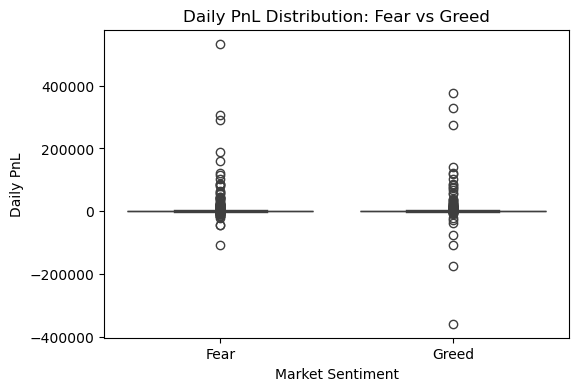

In [120]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=daily_metrics[daily_metrics["classification"].isin(["Fear","Greed"])],
    x="classification",
    y="daily_pnl",
    order=["Fear","Greed"])
plt.title("Daily PnL Distribution: Fear vs Greed")
plt.xlabel("Market Sentiment")
plt.ylabel("Daily PnL")
plt.show()

**Observation:**  
Daily PnL during **Fear** days is more stable, while **Greed** days show higher volatility with larger gains and losses. This suggests traders take more risk during Greed periods.

**Insight:** Fear days show more stable PnL; Greed days exhibit higher volatility and risk.

**BEHAVIOUR METRIC**

In [121]:
behavior_by_sentiment = merged_data.groupby("classification").agg(
    total_trades=("Trade ID", "count"),
    avg_position_size_usd=("Size USD", "mean"),
    long_ratio=("Direction", lambda x: (x.str.lower() == "buy").mean())).reset_index()

In [74]:
behavior_by_sentiment.head()

,classification,total_trades,avg_position_size_usd,long_ratio
0,Extreme Fear,21400,5349.731843,0.037710
1,Extreme Greed,39992,3112.251565,0.128326
2,Fear,61837,7816.109931,0.051862
3,Greed,50303,5736.884375,0.093136
4,Neutral,37686,4782.732661,0.076554


**Insight:** Greed drives higher trading activity and long bias, while Fear leads to fewer but larger, more cautious positions.

In [122]:
fear_greed_behavior = behavior_by_sentiment[
    behavior_by_sentiment["classification"].isin(["Fear", "Greed"])]

In [83]:
fear_greed_behavior.head()

,classification,total_trades,avg_position_size_usd,long_ratio
2,Fear,61837,7816.109931,0.051862
3,Greed,50303,5736.884375,0.093136


**Chart 1** - **TRADE FREQUENCY**

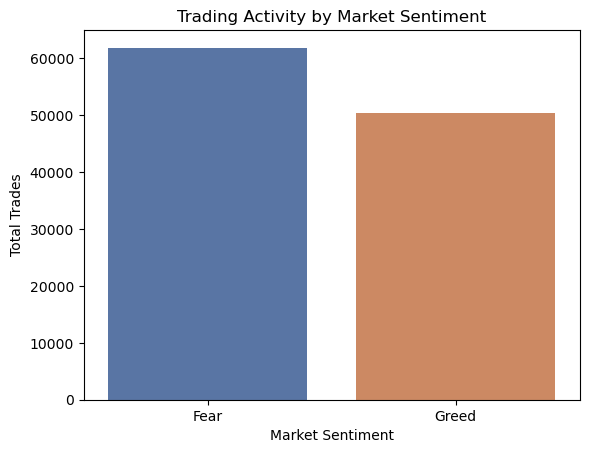

In [123]:
sns.barplot(
    data=fear_greed_behavior,
    x="classification",
    y="total_trades",
    hue="classification",
    order=["Fear", "Greed"],
    palette={"Fear": "#4C72B0", "Greed": "#DD8452"},
    legend=False)
plt.title("Trading Activity by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Total Trades")
plt.show()

**Insight:**  
Trading activity is higher during Greed periods, suggesting that traders become more active and opportunistic when market sentiment is positive.

**CHART 2** - **POSITION SIZE**

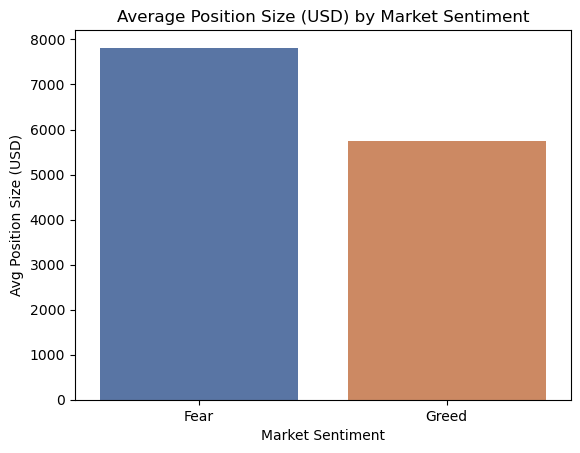

In [124]:
sns.barplot(
    data=fear_greed_behavior,
    x="classification",
    y="avg_position_size_usd",
    hue="classification",
    palette={"Fear": "#4C72B0", "Greed": "#DD8452"},
    legend=False)
plt.title("Average Position Size (USD) by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Avg Position Size (USD)")
plt.show()

**Insight:**  
Fear periods are associated with larger average position sizes, indicating fewer but higher-conviction trades compared to Greed periods.

**CHART 3** - **LONG/ SHORT BIAS**

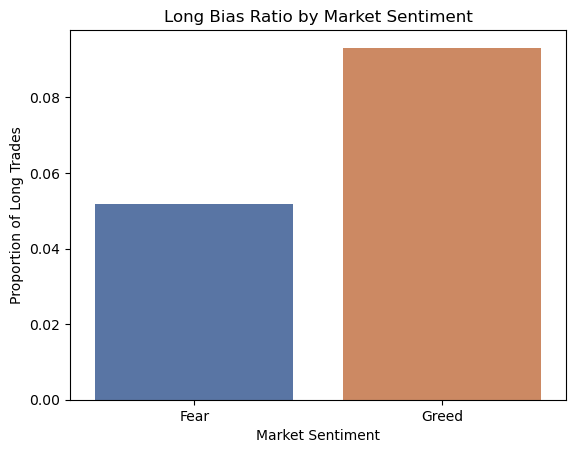

In [125]:
sns.barplot(
    data=fear_greed_behavior,
    x="classification",
    y="long_ratio",
    hue="classification",
    palette={"Fear": "#4C72B0", "Greed": "#DD8452"},
    legend=False)
plt.title("Long Bias Ratio by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Proportion of Long Trades")
plt.show()

**Insight:**  
The proportion of long trades increases during Greed sentiment, reflecting stronger bullish bias among traders.

**SEGMENT 1** - **FREQUENT VS INFREQUENT TRADES**

In [89]:
trades_per_trader = merged_data.groupby("Account")["Trade ID"].count()
merged_data["trader_frequency"] = merged_data["Account"].map(
    lambda x: "Frequent" if trades_per_trader[x] > trades_per_trader.median()
    else "Infrequent")

In [90]:
freq_performance = merged_data.groupby("trader_frequency").agg(
    avg_position_size=("Size USD", "mean"),
    total_trades=("Trade ID", "count")).reset_index()

###  Frequent vs Infrequent Traders

Traders were segmented based on their trading activity level.
Each trader was classified as **Frequent** or **Infrequent** depending on whether
their total number of trades was above or below the median trade count.

This segmentation helps analyze whether trading frequency influences
position sizing and overall trading behavior.

For each segment, the following metrics were evaluated:

- **Average Position Size (USD)**: Measures risk exposure per trade.
- **Total Trades**: Indicates overall trading activity within each segment.


In [92]:
freq_performance.head()

,trader_frequency,avg_position_size,total_trades
0,Frequent,5800.826314,186957
1,Infrequent,4396.190601,24267


**Insight:**  
Frequent traders tend to execute significantly more trades, while infrequent traders
generally take fewer but often larger-sized positions, indicating different risk
management styles.

**SEGMENT 2** - **CONSISTENT VS INCONSISTENT WINNERS**

In [95]:
daily_pnl_std = daily_metrics.groupby("Account")["daily_pnl"].std()
daily_metrics["consistency"] = daily_metrics["Account"].map(
    lambda x: "Consistent" if daily_pnl_std[x] < daily_pnl_std.median()
    else "Inconsistent")

In [96]:
consistency_performance = daily_metrics.groupby("consistency").agg(
    avg_daily_pnl=("daily_pnl", "mean"),
    win_rate=("daily_pnl", lambda x: (x > 0).mean()),
    worst_daily_pnl=("daily_pnl", "min")).reset_index()

### Consistent vs Inconsistent Traders

Trader consistency was measured using the **standard deviation of daily PnL**.
Lower standard deviation indicates more stable performance, while higher values
indicate greater volatility in outcomes.

Traders were classified as:
- **Consistent**: Daily PnL standard deviation below the median
- **Inconsistent**: Daily PnL standard deviation above the median

The following performance metrics were compared across these two segments:
- **Average Daily PnL**
- **Win Rate**
- **Worst Daily PnL** (used as a drawdown proxy)


In [97]:
consistency_performance.head()

,consistency,avg_daily_pnl,win_rate,worst_daily_pnl
0,Consistent,1187.255291,0.696862,-108604.496278
1,Inconsistent,9157.734576,0.521322,-358963.139984


**CONSISTENT VS INCONSISTENT TRADERS (SEGMENTATION)**

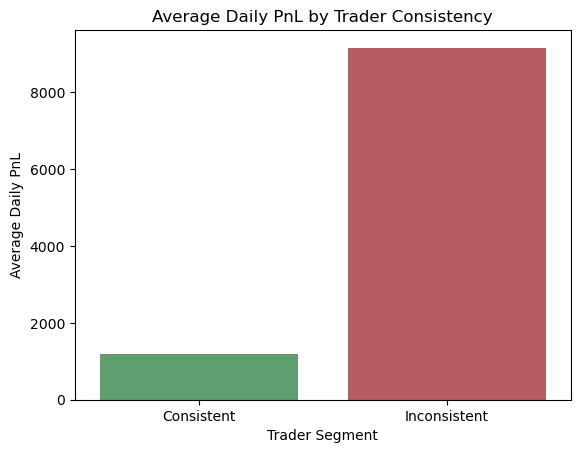

In [126]:
sns.barplot(
    data=consistency_performance,
    x="consistency",
    y="avg_daily_pnl",
    hue="consistency",
    palette={"Consistent": "#55A868", "Inconsistent": "#C44E52"},
    legend=False)
plt.title("Average Daily PnL by Trader Consistency")
plt.xlabel("Trader Segment")
plt.ylabel("Average Daily PnL")
plt.show()

**Insight:**  
Consistent traders show more stable returns with smaller drawdowns,
while inconsistent traders experience higher volatility and deeper losses,
even when average profitability appears similar.

## Part C — Actionable Strategy Recommendations ##

**Strategy 1: Manage Risk During Greed Periods**

**Recommendation:** During Greed market conditions, traders should limit position sizes and avoid excessive trading, especially when markets appear overly optimistic.

**Reasoning:** The analysis shows that Greed days experience larger drawdowns and higher volatility, increasing the risk of significant losses.

**Strategy 2** : **Focus on Quality Trades During Fear Periods**

**Recommendation:** During Fear market conditions, traders should focus on fewer, high-conviction trades and maintain a disciplined trading approach.

**Reasoning:** Fear periods are associated with higher average daily PnL and more stable performance, indicating better risk-adjusted outcomes.

### Summary

This analysis studies how market sentiment (Fear vs Greed) influences trader
performance and behavior. By constructing daily performance metrics and
segmenting traders based on activity and consistency, the project uncovers
behavioral patterns and risk differences across sentiment regimes and proposes
actionable trading insights.